In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import os
import pandas as pd
import scipy.stats
import my_utils as myf

In [2]:
mydir = './data/sia_sie_siv_timeseries/'
myfiles = sorted([f for f in sorted(os.listdir(mydir)) if 'nh' in f])

In [3]:
listds = []
for f in myfiles:
        ds = xr.open_dataset(mydir+f)
        ds = ds[[f for f in ds if 'siv' not in f]]
        listds.append(ds)
ds = xr.concat(listds,dim='names')

In [4]:
thelens = [f for f in ds.names.values if 'LENS' in f]
lensmean = ds.sel(names=thelens).mean(dim='names')
lensmean['names'] = 'LENSmean'
lensmean = lensmean.set_coords('names')

In [5]:
ds = xr.concat([ds,lensmean],dim='names')

In [6]:
lineplotprop = myf.set_line_prop(ds.names.values)

In [7]:
ds.region.values

array(['Central Arctic', 'GIN Seas', 'Barents Sea', 'Kara Sea',
       'Laptev Sea', 'East Siberian Sea', 'Chukchi Sea', 'Bering Sea',
       'Sea of Okhotsk', 'Beaufort Sea', 'Canadian Archipelago',
       'Hudson Bay', 'Baffin Bay', 'Labrador Sea', 'Open Ocean',
       'Pan Arctic'], dtype=object)

In [8]:
pacific_regions = ['Sea of Okhotsk','Bering Sea','Laptev Sea','East Siberian Sea','Chukchi Sea','Beaufort Sea']
atlantic_regions = ['Baffin Bay','GIN Seas','Barents Sea','Kara Sea','Labrador Sea']
neither = ['Central Arctic','Canadian Archipelago','Hudson Bay','Open Ocean','Pan Arctic']

In [9]:
ds_atl = ds.sel(region=atlantic_regions).sum(dim='region')
ds_pac = ds.sel(region=pacific_regions).sum(dim='region')

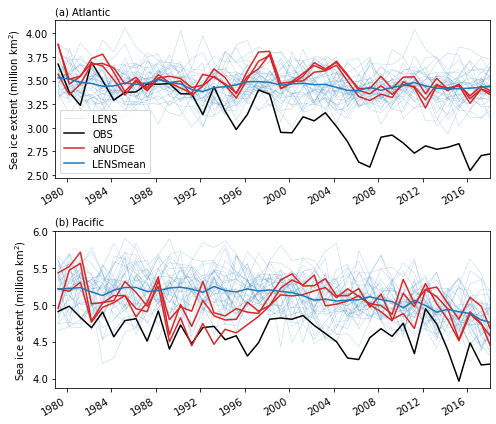

In [10]:
fig = plt.figure(figsize=(7,6))

ax = plt.subplot(2,1,1)
for n, name in enumerate(ds.names.values):
    if 'OBS-CDRv4-cdr' in name or '60' in name or 'LEN' in name:
            ds_atl.sie_nh_reg.sel(names=name).where(ds_atl['time.month']==3,drop=True).plot(ax = ax, **lineplotprop[name].to_dict())     

ax.set_xlabel('')
ax.set_ylabel('Sea ice extent (million km$^2$)')
ax.set_title('')
ax.set_title('(a) Atlantic',fontsize=10,loc='left')
#ax.set_xlim([1979,2018])
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
ax.set_xlim(['1979','2018'])

ax = plt.subplot(2,1,2)
for n, name in enumerate(ds.names.values):
        if 'OBS-CDRv4-cdr' in name or '60' in name or 'LEN' in name:
            ds_pac.sie_nh_reg.sel(names=name).where(ds_pac['time.month']==3,drop=True).plot(ax = ax, **lineplotprop[name].to_dict())     

ax.set_xlabel('')
ax.set_ylabel('Sea ice extent (million km$^2$)')
#ax.axhline(y=0., c='k', linewidth = 0.5)
ax.set_title('')
ax.set_title('(b) Pacific',fontsize=10,loc='left')
ax.set_xlim(['1979','2018'])

plt.tight_layout()
fig.savefig('figs/sie_regional.pdf', dpi=500, bbox_inches='tight')
plt.show(); plt.close()